In [8]:
import numpy as np
import matplotlib.pyplot as plt

dp_dx = -1.0
w = 2.0
n_exp = 5
Ny = np.array([2, 4, 8, 16])
DY = w / 2.0 / Ny
YB = [np.linspace(0, w / 2, n + 1) for n in Ny]
YC = [yb[:-1] + 0.5 * dy for yb, dy in zip(YB, DY)]

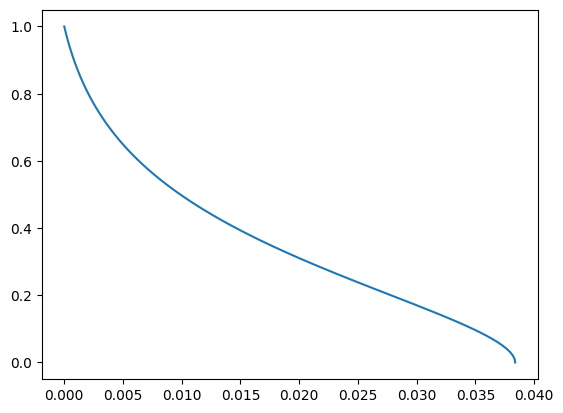

In [9]:
v_exact = lambda y: dp_dx * ((1 + n_exp) * np.exp(-n_exp) - (1 + n_exp * y) * np.exp(-n_exp * y)) / n_exp**2
Y = np.linspace(0, w / 2, 100)
plt.plot(v_exact(Y), Y)

In [10]:
mu = lambda y: np.exp(n_exp * y)
V = []
for yc, yb, dy in zip(YC, YB, DY):
    v = np.zeros(len(yb))
    for i in range(len(yb) - 2, -1, -1):
        v[i] = v[i+1] - dy / mu(yc[i]) * dp_dx * yc[i]
    V.append(v)

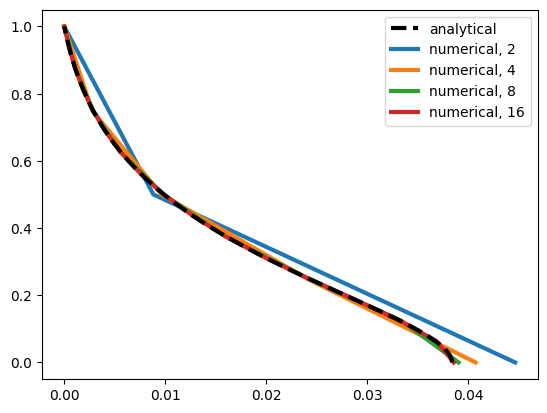

In [11]:
Y = np.linspace(0, w / 2, 100)
plt.plot(v_exact(Y), Y, color='k', linewidth=3, label="analytical", linestyle='--', zorder=20)
[plt.plot(V[i], YB[i], linewidth=3, label="numerical, {}".format(Ny[i]), zorder=10) for i in range(len(Ny))]
plt.legend()
plt.show()

In [12]:
error = [np.linalg.norm(v_exact(YB[i]) - V[i]) / np.linalg.norm(V[i]) for i in range(len(Ny))]
print(error)

[0.13930897403767112, 0.04889154965060081, 0.011171078083527254, 0.0024304215910449303]


In [41]:
import scipy.integrate as integrate 
mu = lambda y: np.exp(n_exp * y)
C = []
MU = []
for yc, yb, dy in zip(YC, YB, DY):
    cn = np.zeros(len(yc))
    aa = yb[:-1]
    bb = yb[1:]
    mun = [integrate.quad(mu, a, b)[0] / (b - a) for a, b in zip(aa, bb)]
    MU.append(mun)
    cn[-1] = -yb[-1]**2 / mun[-1] / 2
    for i in range(len(yc) - 2, -1, -1):
        cn[i] = cn[i+1] + yb[i+1]**2 * (1 / mun[i+1] - 1 / mun[i]) / 2
    C.append(cn)

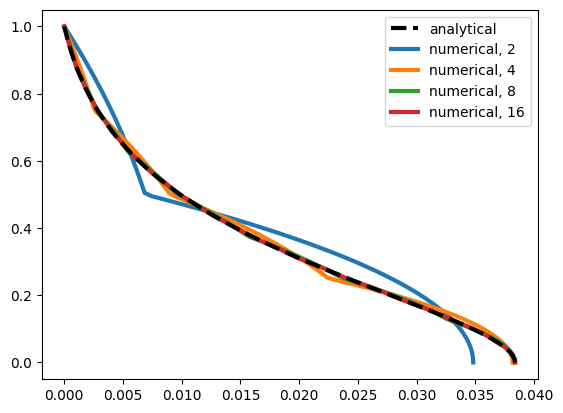

In [48]:
Y = np.linspace(0, w / 2, 100)
V = []
for yc, yb, cn, mun in zip(YC, YB, C, MU):
    v = Y
    idx = np.searchsorted(yb[1:], Y, side='left')
    v = np.array([dp_dx * (Y[i]**2 / mun[idx[i]] / 2 + cn[idx[i]]) for i in range(len(Y))])
    V.append(v)

plt.plot(v_exact(Y), Y, color='k', linewidth=3, label="analytical", linestyle='--', zorder=20)
[plt.plot(V[i], Y, linewidth=3, label="numerical, {}".format(Ny[i]), zorder=10) for i in range(len(Ny))]
plt.legend()
plt.show()

In [44]:
error = [np.linalg.norm(v_exact(Y) - V[i]) / np.linalg.norm(v_exact(Y)) for i in range(len(Ny))]
print(error)

[0.11044299352810448, 0.02941958525009014, 0.007299868253392691, 0.0018027199894318315]
